# loading libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# loading dataset


In [2]:
data=pd.read_csv("dataset3.csv")

In [3]:
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


# understanding the data


In [4]:
data.shape

(11430, 89)

In [5]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [6]:
data.info

<bound method DataFrame.info of                                                      url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19 

In [7]:
data.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [8]:
data['status'].nunique()

2

# Data Visualization

# pre processing

In [9]:
le=preprocessing.LabelEncoder()
label=le.fit_transform(data["status"])
label

array([0, 1, 1, ..., 0, 0, 1])

In [10]:
data['status']=label
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,0
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,1
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,0
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,0


In [11]:
data.corr()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


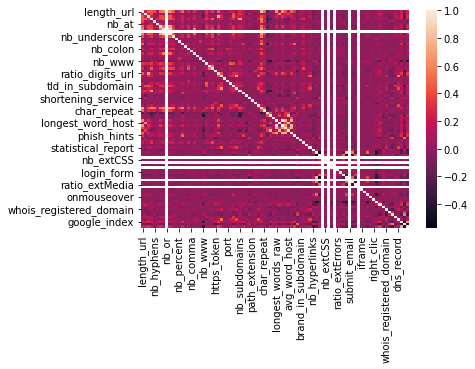

In [12]:
heat=sns.heatmap(data.corr())

In [13]:
x=data.iloc[:,1:88].values
y=data.iloc[:,88].values

In [14]:
print(x.shape)
print(y.shape)

(11430, 87)
(11430,)


# training and testing


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8001, 87)
(3429, 87)
(8001,)
(3429,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [18]:
ML_model=[]
Accuracy=[]
Recall=[]
Precision=[]
f1_Score=[]
times=[]
def storeres(model,a,b,c,d,t):
    ML_model.append(model)
    Accuracy.append(a)
    Recall.append(b)
    Precision.append(c)
    f1_Score.append(d)
    times.append(t)

In [19]:
start_time = time.time() 
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)
y_predict1=dtree.predict(x_test)
dtc_acc=accuracy_score(y_test,y_predict1)
dtc_recall=recall_score(y_test, y_predict1)
dtc_precision=precision_score(y_test,y_predict1)
dtc_f1_score=f1_score(y_test,y_predict1)
end_time = time.time()
decisiontree_time = end_time  - start_time

In [20]:
storeres('Decision Tree',dtc_acc,dtc_recall,dtc_precision,dtc_f1_score,decisiontree_time)
print('Decision Tree:',dtc_acc,dtc_recall,dtc_precision,dtc_f1_score)
print('Execution time for the decision tree:', decisiontree_time,'seconds')

Decision Tree: 0.9087197433654126 0.8803771361225693 0.9314214463840399 0.9051802484095729
Execution time for the decision tree: 0.316509485244751 seconds


In [21]:
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)
rfc_acc=accuracy_score(y_test,y_pred2)
rfc_recall=recall_score(y_test, y_pred2)
rfc_precision=precision_score(y_test,y_pred2)
rfc_f1_score=f1_score(y_test, y_pred2)
end_time = time.time()
randomforest_time = end_time - start_time


In [22]:
storeres('Random Forest',rfc_acc,rfc_recall,rfc_precision,rfc_f1_score,randomforest_time)
print('Execution time:', randomforest_time,'seconds')

Execution time: 0.15786457061767578 seconds


In [23]:
start_time = time.time()
from sklearn.naive_bayes import BernoulliNB
b_bayes=BernoulliNB()
b_bayes.fit(x_train,y_train)
y_pred3=b_bayes.predict(x_test)
NBC_acc=accuracy_score(y_test,y_pred3)
NBC_recall=recall_score(y_test, y_pred3)
NBC_precision=precision_score(y_test,y_pred3)
NBC_f1_score=f1_score(y_test, y_pred3)
end_time = time.time()
navibayes_time = end_time - start_time

In [24]:
storeres("Bernoulli-naivebayes",NBC_acc,NBC_recall,NBC_precision,NBC_f1_score,navibayes_time)
print('Execution time:', navibayes_time,'seconds')

Execution time: 0.029985904693603516 seconds


In [25]:
start_time = time.time()
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred4 = classifier.predict(x_test)
logi_acc=accuracy_score(y_test, y_pred4)
logi_recall=recall_score(y_test, y_pred4)
logi_precision=precision_score(y_test,y_pred4)
logi_f1_score=f1_score(y_test, y_pred4)
end_time = time.time()
logistic_time = end_time - start_time# In[ ]:



C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
storeres("LogisticRegression",logi_acc,logi_recall,logi_precision,logi_f1_score,logistic_time)
print('Execution time:', logistic_time ,'seconds')

Execution time: 0.22131967544555664 seconds


In [27]:
start_time = time.time()
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=42)
svm.fit(x_train,y_train)
y_pred5=svm.predict(x_test)
svm_acc=accuracy_score(y_test,y_pred5)
svm_recall=recall_score(y_test, y_pred5)
svm_precision=precision_score(y_test,y_pred5)
svm_f1_score=f1_score(y_test, y_pred5)
end_time = time.time()
svm_time = end_time - start_time



In [28]:
storeres("SVM",svm_acc,svm_recall,svm_precision,svm_f1_score,svm_time )
print('Execution time:',svm_time,'seconds')

Execution time: 4.460319995880127 seconds


In [29]:
'''start_time = time.time()


error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
end_time = time.time()
print(end_time-start_time)'''

'start_time = time.time()\n\n\nerror1= []\nerror2= []\nfor k in range(1,15):\n    knn= KNeighborsClassifier(n_neighbors=k)\n    knn.fit(x_train,y_train)\n    y_pred1= knn.predict(x_train)\n    error1.append(np.mean(y_train!= y_pred1))\n    y_pred2= knn.predict(x_test)\n    error2.append(np.mean(y_test!= y_pred2))\n# plt.figure(figsize(10,5))\nplt.plot(range(1,15),error1,label="train")\nplt.plot(range(1,15),error2,label="test")\nplt.xlabel(\'k Value\')\nplt.ylabel(\'Error\')\nplt.legend()\nend_time = time.time()\nprint(end_time-start_time)'

In [30]:
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
#from sklearn import metrics
y_pred6=neigh.predict(x_test)
knn_acc=accuracy_score(y_test,y_pred6)
knn_recall=recall_score(y_test, y_pred6)
knn_precision=precision_score(y_test,y_pred6)
knn_f1_score=f1_score(y_test, y_pred6)
end_time = time.time()
knn_time = end_time - start_time


C:\Users\priya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
storeres("KNN",knn_acc,knn_recall,knn_precision,knn_f1_score,knn_time)
print('Execution time:',knn_time ,'seconds')

Execution time: 1.3191022872924805 seconds


In [32]:
start_time = time.time()
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier() 
gbt.fit(x_train,y_train)
y_pred7=gbt.predict(x_test)
gbt_acc=accuracy_score(y_test,y_pred7)
gbt_recall=recall_score(y_test, y_pred7)
gbt_precision=precision_score(y_test,y_pred7)
gbt_f1_score=f1_score(y_test, y_pred7)
end_time = time.time()
gb_time = end_time - start_time

In [33]:
storeres("GradientBoosting",gbt_acc,gbt_recall,gbt_precision,gbt_f1_score,gb_time)
print('Execution time:', gb_time ,'seconds')

Execution time: 9.235121011734009 seconds


In [34]:
start_time = time.time()
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier() 
hgb.fit(x_train,y_train)
y_pred8=hgb.predict(x_test)
hgb_acc=accuracy_score(y_test,y_pred8)
hgb_recall=recall_score(y_test, y_pred8)
hgb_precision=precision_score(y_test,y_pred8)
hgb_f1_score=f1_score(y_test, y_pred8)
end_time = time.time()
histgram_time = end_time -start_time


In [35]:
storeres("HistGradient",hgb_acc,hgb_recall,hgb_precision,hgb_f1_score,histgram_time)
print('Execution time:', histgram_time,'seconds')

Execution time: 5.095618724822998 seconds


In [36]:
start_time = time.time()
from lightgbm import LGBMClassifier
lgb = LGBMClassifier() 
lgb.fit(x_train,y_train)
y_pred9=lgb.predict(x_test)
lgb_acc=accuracy_score(y_test,y_pred9)
lgb_recall=recall_score(y_test, y_pred9)
lgb_precision=precision_score(y_test,y_pred9)
lgb_f1_score=f1_score(y_test, y_pred9)
end_time = time.time()
lgbm_time = end_time - start_time


In [37]:
storeres("LightGrad",lgb_acc,lgb_recall,lgb_precision,lgb_f1_score,lgbm_time)
print('Execution time:', lgbm_time ,'seconds')

Execution time: 3.7017221450805664 seconds


In [38]:
start_time = time.time()
from sklearn.ensemble import AdaBoostClassifier
Adamodel=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model=Adamodel.fit(x_train,y_train)
y_pred10=model.predict(x_test)
adaboost_acc=accuracy_score(y_test,y_pred10)
adaboost_recall=recall_score(y_test, y_pred10)
adaboost_precision=precision_score(y_test,y_pred10)
adaboost_f1_score=f1_score(y_test, y_pred10)
end_time = time.time()
adaboost_time = end_time - start_time



In [39]:
storeres("AdaBoost",adaboost_acc,adaboost_recall,adaboost_precision,adaboost_f1_score,adaboost_time)
print('Execution time:', adaboost_time,'seconds')

Execution time: 6.1738080978393555 seconds


In [40]:
start_time = time.time()
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(x_train,y_train)
y_pred11=xgb.predict(x_test)
xgboost_acc=accuracy_score(y_test,y_pred11)
xgboost_recall=recall_score(y_test, y_pred11)
xgboost_precision=precision_score(y_test,y_pred11)
xgboost_f1_score=f1_score(y_test, y_pred11)
end_time = time.time()
xgboost_time = end_time - start_time

In [41]:
storeres("XGBoost",xgboost_acc,xgboost_recall,xgboost_precision,xgboost_f1_score,xgboost_time)
print('Execution time:', xgboost_time,'seconds')

Execution time: 3.2255706787109375 seconds


In [42]:
result=pd.DataFrame({'ML_model':ML_model,'ACCURACY':Accuracy,'recall':Recall,'precision':Precision,'F1_score':f1_Score,'Time_excute/sec':times})# In[ ]:

In [43]:
result

,ML_model,ACCURACY,recall,precision,F1_score,Time_excute/sec
0,Decision Tree,0.908720,0.880377,0.931421,0.905180,0.316509
1,Random Forest,0.951881,0.920448,0.981156,0.949833,0.157865
2,Bernoulli-naivebayes,0.890639,0.882145,0.895335,0.888691,0.029986
3,LogisticRegression,0.946632,0.945787,0.946344,0.946065,0.221320
4,SVM,0.948673,0.945787,0.950266,0.948021,4.460320
5,KNN,0.945174,0.932233,0.955891,0.943914,1.319102
6,GradientBoosting,0.958880,0.949912,0.966427,0.958098,9.235121
7,HistGradient,0.969087,0.959340,0.977778,0.968471,5.095619
8,LightGrad,0.969087,0.959929,0.977205,0.968490,3.701722
9,AdaBoost,0.946632,0.935769,0.955475,0.945519,6.173808


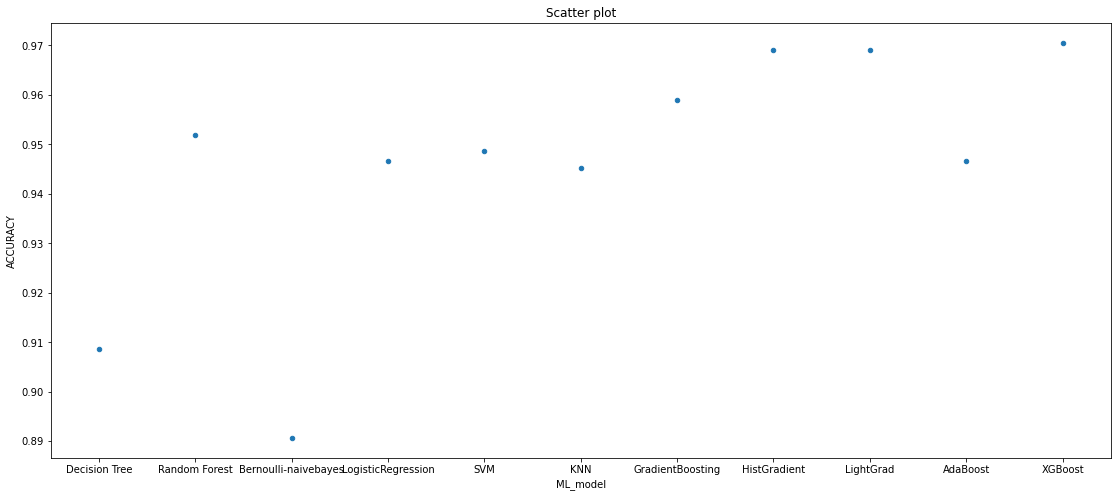

In [44]:
result.plot(kind='scatter',x='ML_model',y='ACCURACY',figsize=(19,8))
plt.title('Scatter plot')
plt.show()

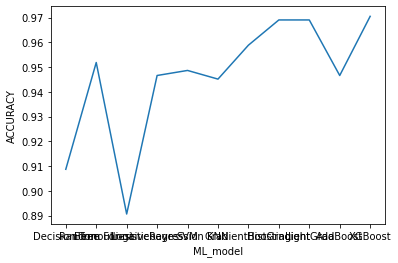

In [45]:
sns.lineplot(data=result,x='ML_model',y='ACCURACY')
plt.show()

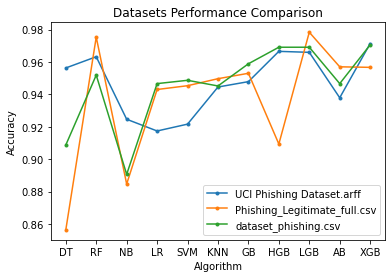

In [3]:
import matplotlib.pyplot as plt

# Data for algorithms
x_values = ["DT","RF","NB","LR","SVM","KNN","GB","HGB","LGB","AB","XGB"]
algorithm1=[0.956286,
0.963220,
0.924631,
0.917395,
0.921616,
0.944528,
0.947844,
0.966536,
0.965933,
0.937896,
0.971360]
algorithm2=[0.856333,
0.975333,
0.884667,
0.943000,
0.945333,
0.949667,
0.953000,
0.909333,
0.978333,
0.957000,
0.956667]
algorithm3=[0.908720,
0.951881,
0.890639,
0.946632,
0.948673,
0.945174,
0.958880,
0.969087,
0.969087,
0.946632,
0.970545,]


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data as lines
ax.plot(x_values, algorithm1, label='UCI Phishing Dataset.arff',marker=".")
ax.plot(x_values, algorithm2, label='Phishing_Legitimate_full.csv',marker=".")
ax.plot(x_values, algorithm3, label='dataset_phishing.csv',marker=".")

# Add labels and legend
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Datasets Performance Comparison')
ax.legend()

# Display the plot
plt.show()

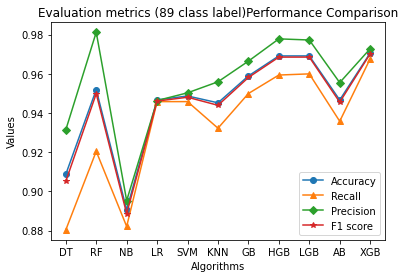

In [2]:
import matplotlib.pyplot as plt

# Data for algorithms
x_values = ["DT","RF","NB","LR","SVM","KNN","GB","HGB","LGB","AB","XGB"]
accuracy=[0.908720,
0.951881,
0.890639,
0.946632,
0.948673,
0.945174,
0.958880,
0.969087,
0.969087,
0.946632,
0.970545,
]
recall= [0.880377,
0.920448,
0.882145,
0.945787,
0.945787,
0.932233,
0.949912,
0.959340,
0.959929,
0.935769,
0.967590
]
precision= [0.931421,
0.981156,
0.895335,
0.946344,
0.950266,
0.955891,
0.966427,
0.977778,
0.977205,
0.955475,
0.972749
]
f1_score=[0.905180,
0.949833,
0.888691,
0.946065,
0.948021,
0.943914,
0.958098,
0.968471,
0.968490,
0.945519,
0.970162
]
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data as lines
ax.plot(x_values, accuracy, label='Accuracy',marker="o")
ax.plot(x_values, recall, label='Recall',marker="^")
ax.plot(x_values, precision, label='Precision',marker="D")
ax.plot(x_values, f1_score, label='F1 score',marker="*")

# Add labels and legend
ax.set_xlabel('Algorithms')
ax.set_ylabel('Values')
ax.set_title('Evaluation metrics (89 class label)Performance Comparison')
ax.legend()

# Display the plot
plt.show()